Found 8 total files. Processing the first 7...

--- File 1 of 7: clean_CY25-05_1-#1.xlsx ---
   Processing sheet: Sheet_1...
   Processing sheet: Sheet_2...
   Processing sheet: Sheet_3...


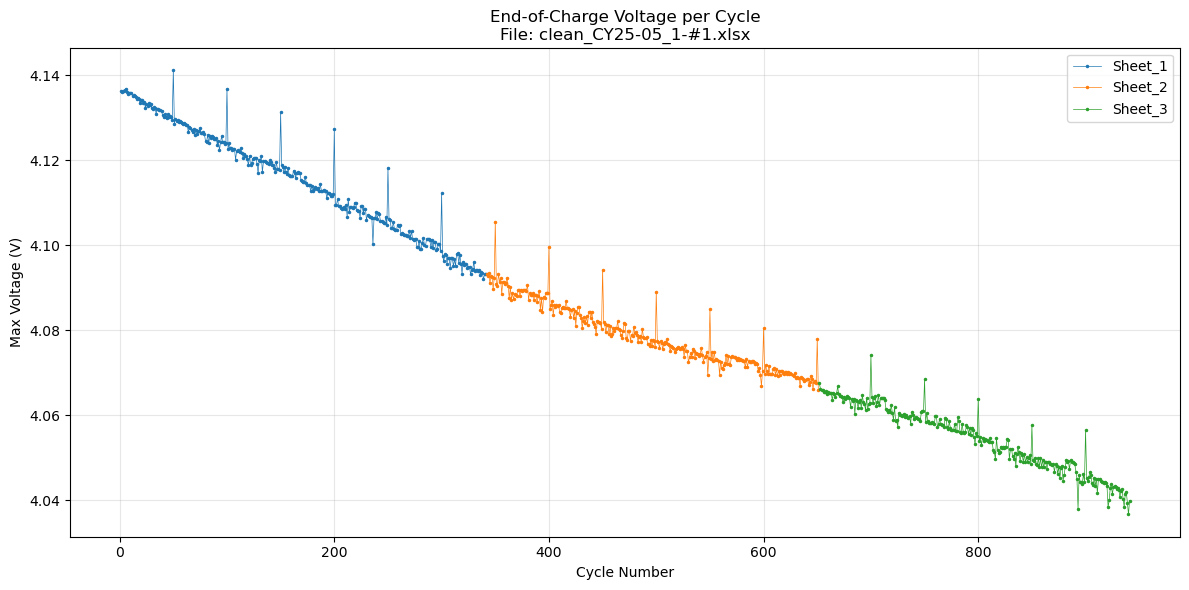


--- File 2 of 7: clean_CY25-05_1-#2.xlsx ---
   Processing sheet: Sheet_1...
   Processing sheet: Sheet_2...
   Processing sheet: Sheet_3...
   Processing sheet: Sheet_4...


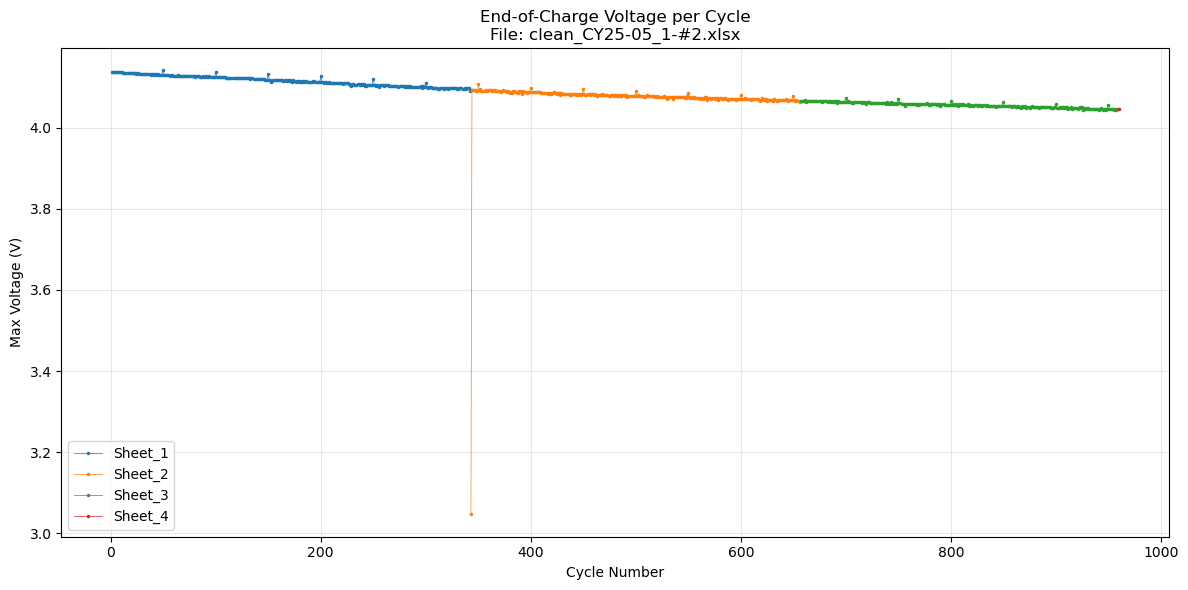


--- File 3 of 7: clean_CY25-05_2-#1.xlsx ---
   Processing sheet: Sheet_1...
   Processing sheet: Sheet_2...
   Processing sheet: Sheet_3...


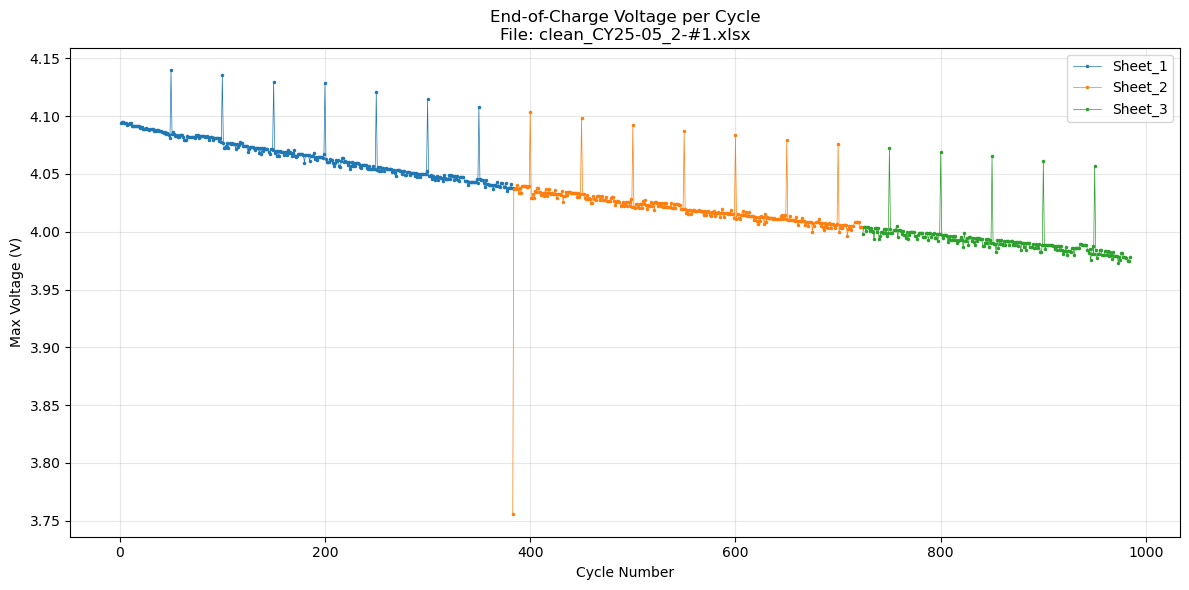


--- File 4 of 7: clean_CY25-05_2-#2.xlsx ---
   Processing sheet: Sheet_1...
   Processing sheet: Sheet_2...
   Processing sheet: Sheet_3...


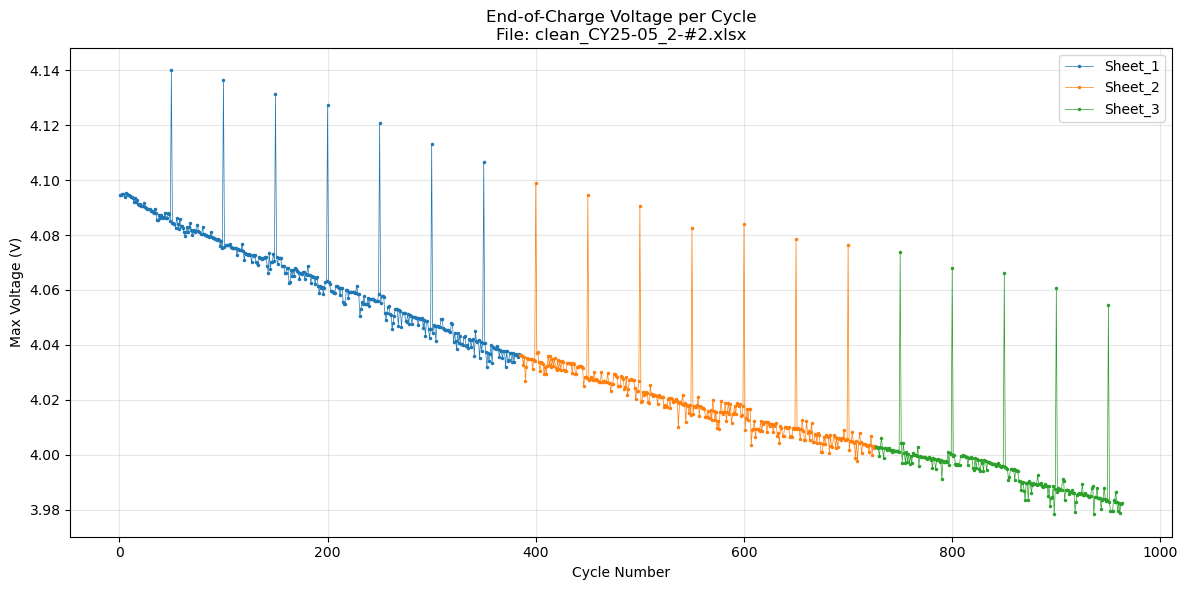


--- File 5 of 7: clean_CY25-05_2-#3.xlsx ---
   Processing sheet: Sheet_1...
   Processing sheet: Sheet_2...
   Processing sheet: Sheet_3...


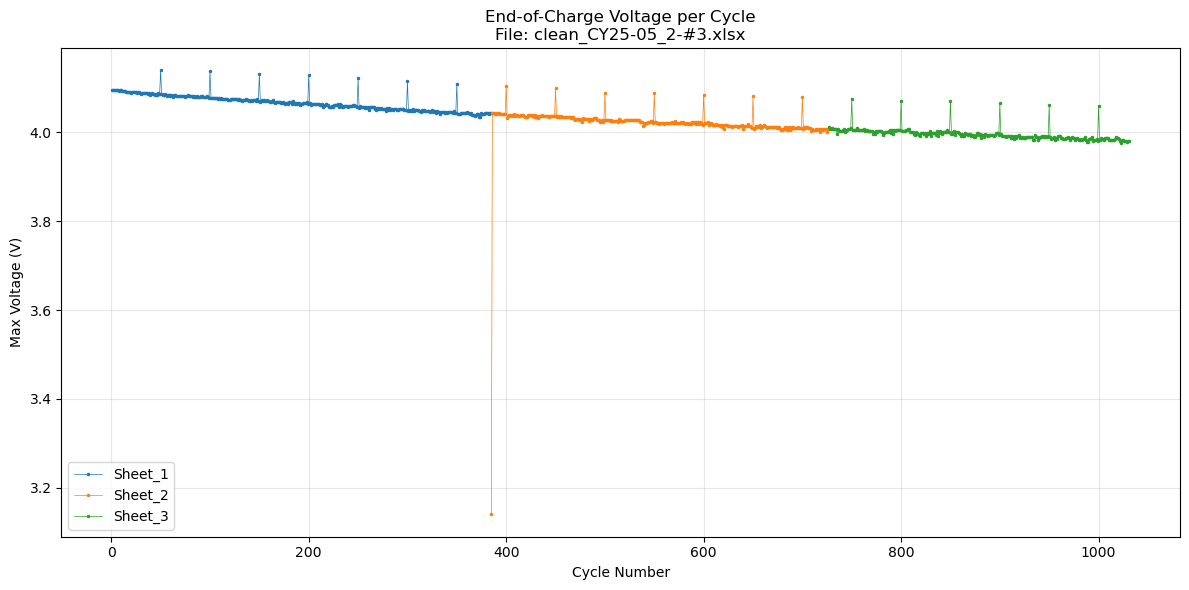


--- File 6 of 7: clean_CY25-05_4-#1.xlsx ---
   Processing sheet: Sheet_1...
   Processing sheet: Sheet_2...
   Processing sheet: Sheet_3...


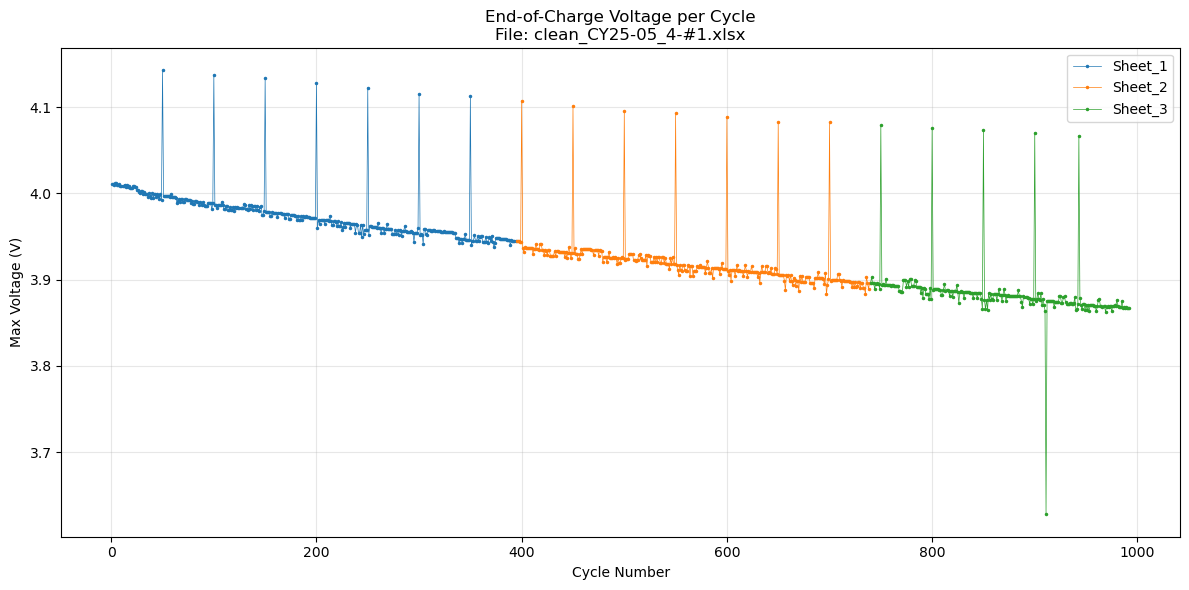


--- File 7 of 7: clean_CY25-05_4-#2.xlsx ---
   Processing sheet: Sheet_1...
   Processing sheet: Sheet_2...
   Processing sheet: Sheet_3...


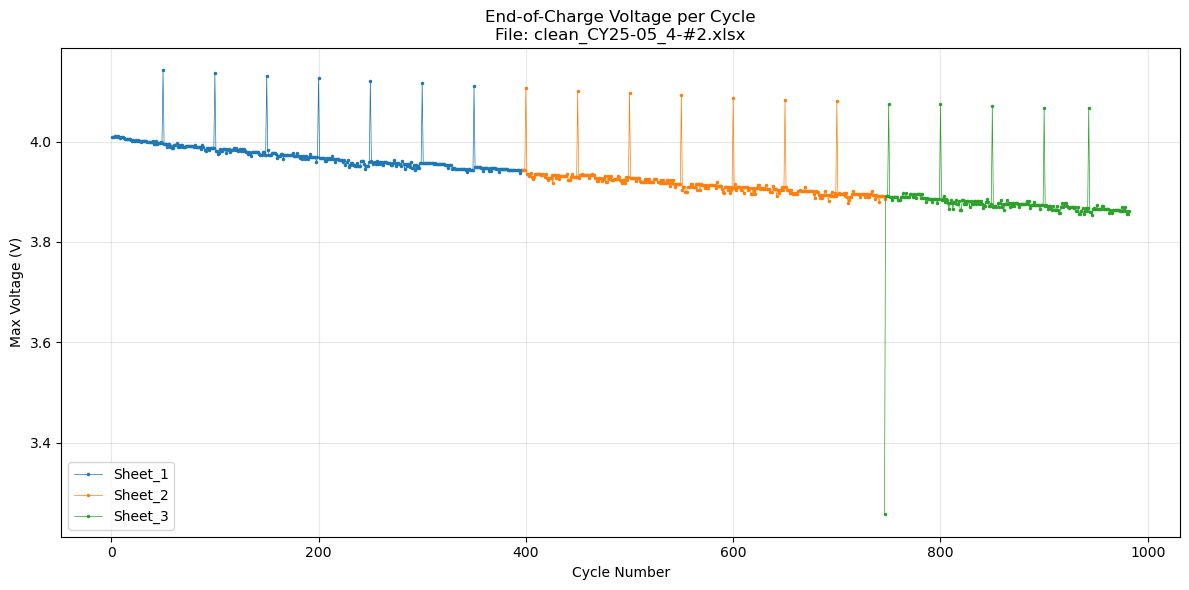

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 1. FIND ALL EXCEL FILES
# Looks for .xlsx files in the current folder (ignoring temporary ~$ files)
files = [f for f in glob.glob("*.xlsx") if not os.path.basename(f).startswith("~$")]

if not files:
    print("No Excel files found! Make sure you are in the correct folder.")
else:
    # 2. SELECT THE FIRST 7 FILES (Indices 0 to 6)
    # Python slicing [:7] safely handles cases where you have fewer than 7 files.
    target_files = files[:7] 

    print(f"Found {len(files)} total files. Processing the first {len(target_files)}...")

    # 3. OUTER LOOP: Iterate through each file
    for i, target_file in enumerate(target_files):
        print(f"\n--- File {i+1} of {len(target_files)}: {target_file} ---")
        
        try:
            # Load the Excel wrapper to see all sheets
            xls = pd.ExcelFile(target_file)
            
            # Create a NEW Figure for this file
            plt.figure(figsize=(12, 6))
            
            # 4. INNER LOOP: Iterate through all sheets in this specific file
            for sheet_name in xls.sheet_names:
                print(f"   Processing sheet: {sheet_name}...")
                
                # Read Data
                df = pd.read_excel(target_file, sheet_name=sheet_name)
                
                # Check if required columns exist to avoid errors
                if 'cycle number' in df.columns and 'Ecell/V' in df.columns:
                    # 5. CALCULATE STATS
                    # Group by cycle and find the MAX voltage for each group
                    max_voltage_per_cycle = df.groupby('cycle number')['Ecell/V'].max()
                    
                    # 6. PLOT
                    plt.plot(max_voltage_per_cycle.index, 
                             max_voltage_per_cycle.values, 
                             marker='.',          
                             markersize=3, 
                             linewidth=0.5, 
                             label=sheet_name)
                else:
                    print(f"   Warning: Columns 'cycle number' or 'Ecell/V' missing in {sheet_name}")

            # Formatting specific to this file
            plt.title(f'End-of-Charge Voltage per Cycle\nFile: {target_file}')
            plt.xlabel('Cycle Number')
            plt.ylabel('Max Voltage (V)')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            
            # Display the plot for this file
            plt.show()

        except Exception as e:
            print(f"Error processing file {target_file}: {e}")

Found 8 files. Processing...

Processing: clean_CY25-05_1-#1.xlsx...


KeyboardInterrupt: 